In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
import pandas as pd

In [ ]:
glove_input_file = "/Users/martinkvammen/Google Drive (martin.kvammen@gmail.com)/1. Masters Thesis/5. Shared Thesis /3.1. Data/2.2. Models/glove/easyjet_vocab_vectors/vectors_tweets_easyjet.txt"

In [ ]:
word2vec_output_file = "/Users/martinkvammen/Google Drive (martin.kvammen@gmail.com)/1. Masters Thesis/5. Shared Thesis /3.1. Data/2.2. Models/word2vec/gensim_glove_vectors_easyjet_tweets.txt.word2vec"

In [ ]:
glove2word2vec(glove_input_file, word2vec_output_file)

(6733, 50)

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
filename = "/Users/martinkvammen/Google Drive (martin.kvammen@gmail.com)/1. Masters Thesis/5. Shared Thesis /3.1. Data/2.2. Models/word2vec/gensim_glove_vectors_easyjet_tweets.txt.word2vec"

In [ ]:
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
result = model.most_similar(positive=['easyjet', 'backless'], negative=['seat'], topn=1)
print(result)

[('hein', 0.6760423183441162)]


In [ ]:
model.most_similar(positive=['easyjet'], topn=100)

[('flight', 0.6741487979888916),
 ('easyjetpress', 0.6609976291656494),
 ('mattiasharri', 0.6505906581878662),
 ('seat', 0.6173574924468994),
 ('luton', 0.6002777814865112),
 ('allow', 0.5914946794509888),
 ('easa', 0.5876483917236328),
 ('backless', 0.5800520777702332),
 ('like', 0.5716811418533325),
 ('geneveaeroport', 0.5713960528373718),
 ('iata', 0.565977156162262),
 ('ryanair', 0.5622941255569458),
 ('think', 0.546832799911499),
 ('passeng', 0.5453639030456543),
 ('ask', 0.5436176657676697),
 ('fli', 0.5435693860054016),
 ('canõt', 0.5413051843643188),
 ('go', 0.5408858060836792),
 ('see', 0.5391814112663269),
 ('want', 0.5351955890655518),
 ('donõt', 0.5324752330780029),
 ('geneva', 0.5297837257385254),
 ('beat', 0.529310941696167),
 ('explain', 0.528339684009552),
 ('boylecatriona', 0.5243189334869385),
 ('plane', 0.5230119228363037),
 ('know', 0.5229961276054382),
 ('peopl', 0.5180256366729736),
 ('thank', 0.5175467133522034),
 ('tell', 0.5151576995849609),
 ('happen', 0.51490

In [ ]:
from gensim import corpora, models, similarities
import pyLDAvis

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

/Users/nikolajfrandsen/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/nikolajfrandsen/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [ ]:
model.wv['easyjet']

/Users/nikolajfrandsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-0.07976 ,  0.027896, -0.023634,  0.053717, -0.03026 ,  0.021242,
        0.023185,  0.018609,  0.097583, -0.064271, -0.025817, -0.016775,
        0.142416,  0.066484, -0.022037,  0.009175, -0.072676,  0.076884,
        0.123929,  0.009886, -0.052499,  0.002483, -0.021419,  0.059252,
       -0.071732, -0.060431,  0.061448,  0.11343 ,  0.015534, -0.028451,
        0.044531,  0.069528, -0.056012,  0.05277 ,  0.063997,  0.035961,
        0.011498, -0.106666,  0.040318,  0.019653, -0.038868,  0.004438,
       -0.035769, -0.084245, -0.131521, -0.057067,  0.043486, -0.062623,
       -0.040825, -0.03867 ], dtype=float32)

In [ ]:
def tsne_plot(model):
    #Creates a TSNE model and plots it
    labels = []
    tokens = []
    
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
        
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16))
    for i in range (len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                    xy = (x[i], y[i]),
                    xytext=(5,2),
                    textcoords = 'offset points',
                    ha ='right',
                    va = 'bottom')
        
    plt.show()

/Users/nikolajfrandsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


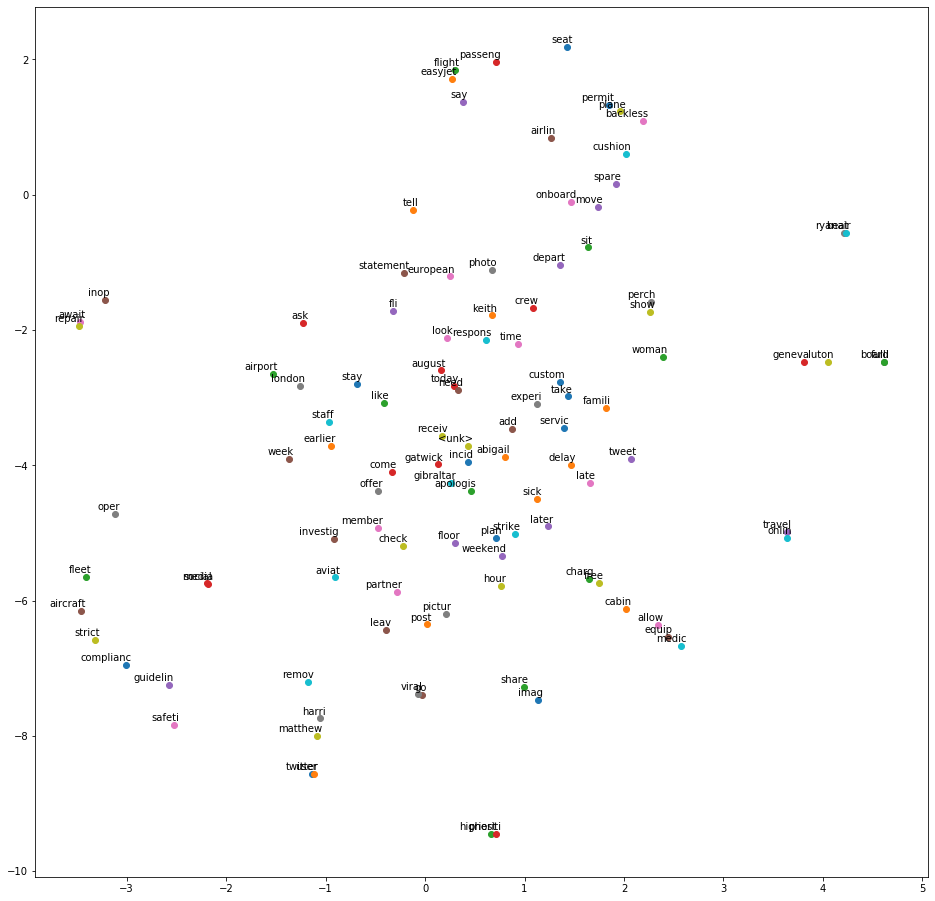

In [ ]:
tsne_plot(model)